<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Machine_Learning/blob/main/ANN_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [34]:
#Import some basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [36]:
dataset.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [37]:
##Divide the dataset into dependent and independent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [38]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [39]:
y.head(3)

0    1
1    0
2    1
Name: Exited, dtype: int64

In [40]:
##Feature Engineering

geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [41]:
##Concatenate these variable with dataframe

X=X.drop(['Geography','Gender'], axis=1)


In [42]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [43]:
X=pd.concat([X, geography,gender],axis=1)

In [44]:
##Splitting the dataset into training and testing 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
##Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [46]:
X_train   

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [47]:
X_train.shape

(8000, 11)

In [48]:
##Part II

##Let's create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [49]:
##Let's initialise ANN

classifier=Sequential()

In [50]:
##Adding input layer

classifier.add(Dense(units=11,activation='relu'))

In [51]:
#Adding the first hidden layer

classifier.add(Dense(units=7,activation='relu'))

In [52]:
#Adding the second hidden layer

classifier.add(Dense(units=6,activation='relu'))

In [53]:
#Adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [54]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [63]:
##Eearly stopping

import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [64]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5232 - accuracy: 0.7746 - val_loss: 0.4557 - val_accuracy: 0.8016
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4349 - accuracy: 0.8166 - val_loss: 0.4326 - val_accuracy: 0.8099
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4089 - accuracy: 0.8300 - val_loss: 0.4115 - val_accuracy: 0.8239
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3829 - accuracy: 0.8438 - val_loss: 0.3899 - val_accuracy: 0.8338
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3644 - accuracy: 0.8513 - val_loss: 0.3805 - val_accuracy: 0.8376
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3548 - accuracy: 0.8546 - val_loss: 0.3760 - val_accuracy: 0.8417
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3488 - accuracy: 0.8565 - val_loss: 0.3707 - val_accuracy:

In [66]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

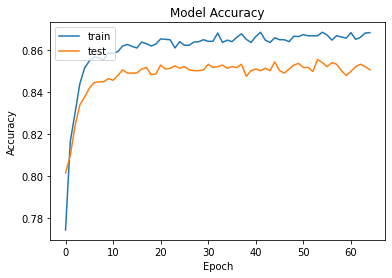

In [68]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

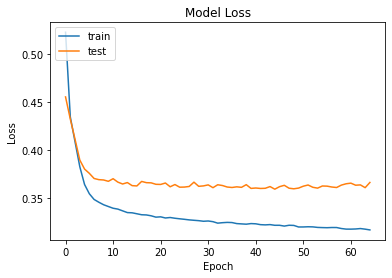

In [69]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()